## Assignment 3 
## Question 1: SVM Classifier
### Name: Barun Parua
### Roll Number: 21CS10014

### Imports
Here is the list of all the libraries used in this assignment.

In [88]:
# ucimlrepo for fetching the dataset
from ucimlrepo import fetch_ucirepo

# numpy, matplotlib for data manipulation and visualization
# tabulate for printing the results in a table
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# sklearn for splitting the dataset and for SVM
# also used for scaling the dataset as it gives much faster results
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# for fetching the dataset
spambase = fetch_ucirepo(id=94)

## Part A: SVM Classifier

### Data Loading

We load the data in the appropriate format and then convert it into a numpy arrays for further processing. It is also scaled using standard scaler for better performance. Finally it is split into training and testing data.

Note that the y arrays are reshaped to avoid warnings during training.

In [89]:
X = spambase.data.features
y = spambase.data.targets

# convert to numpy array
X = np.array(X)
y = np.array(y)

# scale the data
# this makes the svm converge much faster in all cases
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

# make the data in ND array form
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# change shape of y_train and y_test to (n, )
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

### Training the SVM Classifier

We train the SVM classifier using the training data and then predict the labels for the test data. We also calculate the accuracy, precision, recall and f1 score for the classifier.

In [90]:
# train the SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# report the accuracy, precision, recall and f1 score in a table
y_pred = clf.predict(X_train)

print("Metrics of SVM with Linear Kernel on Train Data")
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

table = [['Accuracy', accuracy], ['Precision', precision], ['Recall', recall], ['F1 Score', f1]]
print(tabulate(table, headers=['Metric', 'Value']))

Metrics of SVM with Linear Kernel on Train Data
Metric        Value
---------  --------
Accuracy   0.92962
Precision  0.926934
Recall     0.891799
F1 Score   0.909027


### Evaluation of Model on Test Data

Now, the model is evaluated on the test data and the accuracy, precision, recall and f1 score are calculated. It can be seen that while the accuracy is a bit lower than train data, it is still very high. The confusion matrix is also printed.

In [91]:
# predict on the test data
y_pred = clf.predict(X_test)

# report the accuracy, precision, recall, and f1 score on the test data in tabular form
print("Metrics of SVM with Linear Kernel on Test Data")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

table = [['Accuracy', accuracy], ['Precision', precision], ['Recall', recall], ['F1 Score', f1]]
print(tabulate(table, headers=['Metric', 'Value']))

# confusion matrix
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

Metrics of SVM with Linear Kernel on Test Data
Metric        Value
---------  --------
Accuracy   0.948969
Precision  0.938719
Recall     0.930939
F1 Score   0.934813

Confusion Matrix
[[537  22]
 [ 25 337]]


### Regularization

Now, we use regularization to improve the performance of the model by reducing overfitting. The value of C is varied and the accuracy, precision, recall and f1 score are calculated for each value. It is tabulated and plotted to see the effect of regularization.

In [92]:
# Regularization
# Tabularising the accuracy values for different values of C

acc = []

# train the SVM model with C=0.001 and report the accuracy on the test data
clf = SVC(kernel='linear', C=0.001)
clf.fit(X_train, y_train)

# report the accuracy on the test data
y_pred = clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

# train the SVM model with C=0.1 and report the accuracy on the test data
clf = SVC(kernel='linear', C=0.1)
clf.fit(X_train, y_train)

# report the accuracy on the test data
y_pred = clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

# train the SVM model with C=1 and report the accuracy on the test data
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# report the accuracy on the test data
y_pred = clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

# train the SVM model with C=10 and report the accuracy on the test data
clf = SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)

# report the accuracy on the test data
y_pred = clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

# train the SVM model with C=100 and report the accuracy on the test data
clf = SVC(kernel='linear', C=100)
clf.fit(X_train, y_train)

# report the accuracy on the test data
y_pred = clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

# display the accuracy values in a table
print("Effect of regularisation\nAccuracy for different values of C")
table = [['C=0.001', acc[0]], ['C=0.1', acc[1]], ['C=1', acc[2]], ['C=10', acc[3]], ['C=100', acc[4]]]
print(tabulate(table, headers=['C', 'Accuracy']))

Effect of regularisation
Accuracy for different values of C
C          Accuracy
-------  ----------
C=0.001    0.891422
C=0.1      0.948969
C=1        0.948969
C=10       0.952226
C=100      0.952226


### Observation and Plot

For higher values of C, overfitting is reduced and the accuracy, precision, recall and f1 score are improved. 

Now, the plot is done with respect to log(C) instead of C. This is because the values of C vary over a large range and hence it is better to plot it in log scale. 

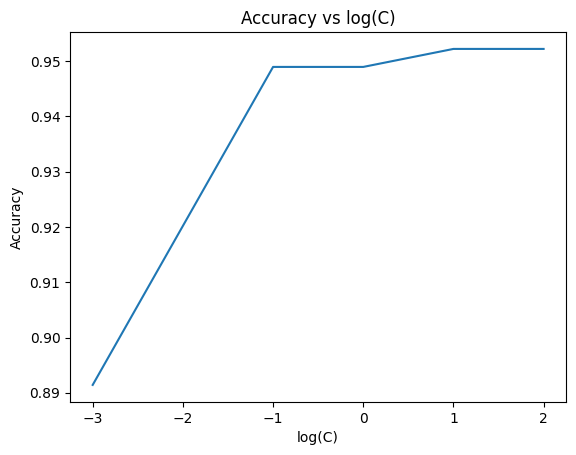

In [93]:
# plot the accuracy values for different values of C
# plot wrt log(C) on the x-axis
x = [0.001, 0.1, 1, 10, 100]
y = acc
plt.plot(np.log10(x), y)
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs log(C)')
plt.show()

## Part B: Kernel Tricks

Tricks that are used to improve the performance of SVM, by using kernels which are non-linear transformations of the data.

### Poly Kernels

Here we see the effect of using polynomial kernels with degrees 2 and 3. The accuracy, precision, recall and f1 score are calculated for each kernel and the results are tabulated and plotted.

It can be seen that the accuracy, precision, recall and f1 score are actually lower than the linear kernel.

In [94]:
# poly kernel degree 2
# train the SVM model with poly kernel and degree=2 and report the accuracy on the test data
clf = SVC(kernel='poly', degree=2)
clf.fit(X_train, y_train)

# report the accuracy on the test data
y_pred = clf.predict(X_test)
print("Results for poly kernel and degree=2")
acc = [ accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred) ]
table = [['Accuracy', acc[0]], ['Precision', acc[1]], ['Recall', acc[2]], ['F1 Score', acc[3]]]
print(tabulate(table, headers=['Metric', 'Value']))
print()

# poly kernel degree 3
# train the SVM model with poly kernel and degree=3 and report the accuracy on the test data
clf = SVC(kernel='poly', degree=3)
clf.fit(X_train, y_train)

# report the accuracy on the test data
y_pred = clf.predict(X_test)
print("Results for poly kernel and degree=3")
acc = [ accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred) ]
table = [['Accuracy', acc[0]], ['Precision', acc[1]], ['Recall', acc[2]], ['F1 Score', acc[3]]]
print(tabulate(table, headers=['Metric', 'Value']))

Results for poly kernel and degree=2
Metric        Value
---------  --------
Accuracy   0.847991
Precision  0.954918
Recall     0.643646
F1 Score   0.768977

Results for poly kernel and degree=3
Metric        Value
---------  --------
Accuracy   0.777416
Precision  0.938547
Recall     0.464088
F1 Score   0.621072


### Sigmoid and RBF Kernels

Next, we see the effect of using sigmoid and RBF kernels. The accuracy, precision, recall and f1 score are calculated and reported.

In [95]:
# sigmoid kernel
# train the SVM model with sigmoid kernel and report the accuracy on the test data
clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)

# report the accuracy on the test data
y_pred = clf.predict(X_test)
print("Results for sigmoid kernel")
acc = [ accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred) ]
table = [['Accuracy', acc[0]], ['Precision', acc[1]], ['Recall', acc[2]], ['F1 Score', acc[3]]]
print(tabulate(table, headers=['Metric', 'Value']))
print()

# rbf kernel
# train the SVM model with rbf kernel and report the accuracy on the test data
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# report the accuracy on the test data
y_pred = clf.predict(X_test)
print("Results for rbf kernel")
acc = [ accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred) ]
table = [['Accuracy', acc[0]], ['Precision', acc[1]], ['Recall', acc[2]], ['F1 Score', acc[3]]]
print(tabulate(table, headers=['Metric', 'Value']))

Results for sigmoid kernel
Metric        Value
---------  --------
Accuracy   0.889251
Precision  0.869318
Recall     0.845304
F1 Score   0.857143

Results for rbf kernel
Metric        Value
---------  --------
Accuracy   0.952226
Precision  0.954286
Recall     0.922652
F1 Score   0.938202


## Part C: Overfitting and Underfitting Analysis

### Using Polynomial Kernel with varying degrees and regularization parameters

Next, we see the effect of using polynomial kernels with varying degrees and regularization parameters. The accuracy, precision, recall and f1 score are calculated and reported. This gives us a better idea of whether the model is overfitting or underfitting.

Higher values of C lead to overfitting which can be seen as the train accuracy is much higher than test accuracy. However, large values of C help to give better results for the test data.

In [96]:
# Experimenting with different kernel complexities and regularization parameters
test_acc = []
train_acc = []

# 1. poly kernel with degree=1 and C=0.01
# train the SVM model with poly kernel and degree=1 and C=0.01 and report the accuracy on the test data and train data
clf = SVC(kernel='poly', degree=1, C=0.01)
clf.fit(X_train, y_train)

# report the accuracy on the train data
y_pred = clf.predict(X_train)
train_acc.append(accuracy_score(y_train, y_pred))

# report the accuracy on the test data
y_pred = clf.predict(X_test)
test_acc.append(accuracy_score(y_test, y_pred))

# 2. poly kernel with degree=1 and C=100
# train the SVM model with poly kernel and degree=1 and C=100 and report the accuracy on the test data and train data
clf = SVC(kernel='poly', degree=1, C=100)
clf.fit(X_train, y_train)

# report the accuracy on the train data
y_pred = clf.predict(X_train)
train_acc.append(accuracy_score(y_train, y_pred))

# report the accuracy on the test data
y_pred = clf.predict(X_test)
test_acc.append(accuracy_score(y_test, y_pred))

# 3. poly kernel with degree=3 and C=0.01
# train the SVM model with poly kernel and degree=3 and C=0.01 and report the accuracy on the test data and train data
clf = SVC(kernel='poly', degree=3, C=0.01)
clf.fit(X_train, y_train)

# report the accuracy on the train data
y_pred = clf.predict(X_train)
train_acc.append(accuracy_score(y_train, y_pred))

# report the accuracy on the test data
y_pred = clf.predict(X_test)
test_acc.append(accuracy_score(y_test, y_pred))

# 4. poly kernel with degree=3 and C=100
# train the SVM model with poly kernel and degree=3 and C=100 and report the accuracy on the test data and train data
clf = SVC(kernel='poly', degree=3, C=100)
clf.fit(X_train, y_train)

# report the accuracy on the train data
y_pred = clf.predict(X_train)
train_acc.append(accuracy_score(y_train, y_pred))

# report the accuracy on the test data
y_pred = clf.predict(X_test)
test_acc.append(accuracy_score(y_test, y_pred))

# tabularise the accuracy values for different values of C
# use zip and tabulate for pretty printing
table = zip([1, 2, 3, 4], ['poly kernel with degree=1 and C=0.01', 'poly kernel with degree=1 and C=100', 'poly kernel with degree=3 and C=0.01', 'poly kernel with degree=3 and C=100'], train_acc, test_acc)
print(tabulate(table, headers=['Experiment','Kernel', 'Train Accuracy', 'Test Accuracy']))

  Experiment  Kernel                                  Train Accuracy    Test Accuracy
------------  ------------------------------------  ----------------  ---------------
           1  poly kernel with degree=1 and C=0.01          0.811413         0.813246
           2  poly kernel with degree=1 and C=100           0.930435         0.950054
           3  poly kernel with degree=3 and C=0.01          0.638859         0.624321
           4  poly kernel with degree=3 and C=100           0.963587         0.94354


### Plotting Graphs to see the effect of overfitting and underfitting

Finally, we plot the graphs of accuracy on test and train data with respect to the degree of the polynomial kernel and regularization parameters.

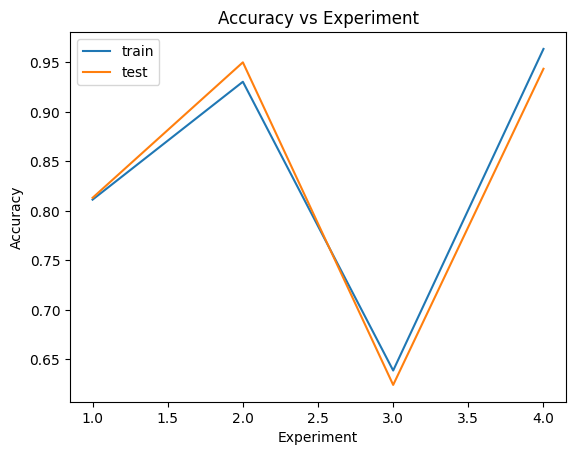

In [97]:
# plot the accuracy values for different values of C

plt.plot([1, 2, 3, 4], train_acc, label="train")
plt.plot([1, 2, 3, 4], test_acc, label="test")
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Experiment')
plt.legend()
plt.show()

## Conclusion

In this assignment, we have seen the effect of using SVM classifier on the given dataset. We have also seen the effect of using different kernels and regularization parameters on the performance of the model. 